# Model Comparison Report by Experiment Type

This report compares the performance of all models under the `data/predictions` directory, grouped by experiment type (rag, zeroshot, fewshot, cot). For each experiment, a table and line graphs are provided to visualize the metrics (correct_instances, total_instances, comet_score, meta_score) per language for each model.

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "./data/predictions"
models = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
experiment_map = {
    "rag": ["rag-wikidata", "rag-wikidata-entity-type-matching", "one_shot_rag_wikidata", "zero_shot_rag_wikidata"],
    "zeroshot": ["zero-shot", "zero_shot", "zero-shot-1", "zero-shot-2", "zero_shot_longer_prompt"],
    "fewshot": ["few-shot", "few(3)_shot", "few(3)_shot_longer_prompt", "one_shot_longer_prompt", "one_shot"],
    "cot": ["cot"]
}

# Collect results: {experiment: {model: {lang: metrics_dict}}}
results = {}
for exp_group, exp_folders in experiment_map.items():
    results[exp_group] = {}
    for model in models:
        model_dir = os.path.join(base_dir, model, "validation")
        found = False
        for exp_folder in exp_folders:
            exp_path = os.path.join(model_dir, exp_folder, "scores")
            if os.path.isdir(exp_path):
                found = True
                break
        if not found:
            continue
        results[exp_group][model] = {}
        for exp_folder in exp_folders:
            exp_path = os.path.join(model_dir, exp_folder, "scores")
            if not os.path.isdir(exp_path):
                continue
            for fname in os.listdir(exp_path):
                if fname.endswith(".json"):
                    lang = fname.replace(".json", "")
                    with open(os.path.join(exp_path, fname), "r", encoding="utf-8") as f:
                        data = json.load(f)
                        results[exp_group][model][lang] = {
                            "correct_instances": data.get("correct_instances", 0),
                            "total_instances": data.get("total_instances", 0),
                            "comet_score": data.get("comet_score", None),
                            "meta_score": data.get("meta_score", None)
                        }

In [2]:
# Collect results: {experiment_type: {model: {experiment: {lang: metrics_dict}}}}
results = {}
for exp_group, exp_folders in experiment_map.items():
    results[exp_group] = {}
    for model in models:
        model_dir = os.path.join(base_dir, model, "validation")
        for exp_folder in exp_folders:
            exp_path = os.path.join(model_dir, exp_folder, "scores")
            if not os.path.isdir(exp_path):
                continue
            if model not in results[exp_group]:
                results[exp_group][model] = {}
            if exp_folder not in results[exp_group][model]:
                results[exp_group][model][exp_folder] = {}
            for fname in os.listdir(exp_path):
                if fname.endswith(".json"):
                    lang = fname.replace(".json", "")
                    with open(os.path.join(exp_path, fname), "r", encoding="utf-8") as f:
                        data = json.load(f)
                        results[exp_group][model][exp_folder][lang] = {
                            "correct_instances": data.get("correct_instances", 0),
                            "total_instances": data.get("total_instances", 0),
                            "comet_score": data.get("comet_score", None),
                            "meta_score": data.get("meta_score", None)
                        }


## Rag Experiment

### Correct / Total Instances Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,Total Instances,722,731,739,724,730,723,745,710,732,722
1,facebook_nllb_200_3.3b (rag-wikidata),407,341,411,424,446,350,352,221,370,230
2,facebook_nllb_200_3.3b (rag-wikidata-entity-ty...,405,344,393,405,436,331,394,234,386,239
3,gemma3_instruct_4b_text (rag-wikidata),503,498,537,468,546,525,501,410,445,411
4,mistral7b (one_shot_rag_wikidata),417,430,522,385,459,385,408,315,304,358
5,mistral7b (zero_shot_rag_wikidata),13,160,231,191,183,23,17,2,74,29


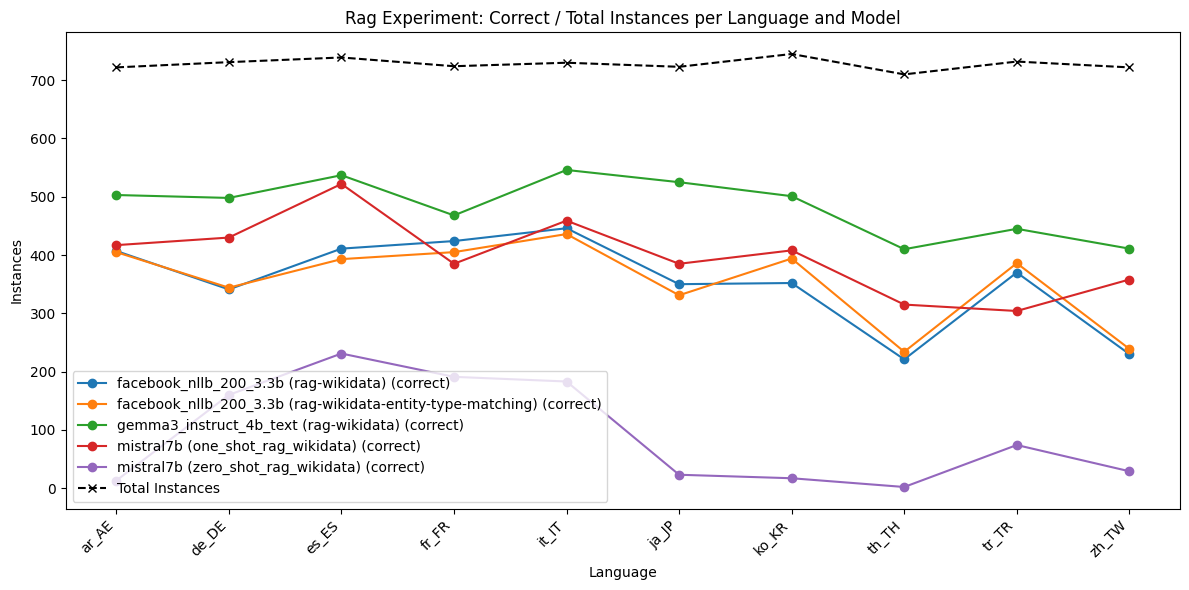


### COMET Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (rag-wikidata),0.899092,0.876145,0.904783,0.894836,0.912899,0.901199,0.905413,0.844910,0.914470,0.853902
1,facebook_nllb_200_3.3b (rag-wikidata-entity-ty...,0.900469,0.880849,0.902992,0.888537,0.914546,0.892243,0.905956,0.853740,0.919268,0.853816
2,gemma3_instruct_4b_text (rag-wikidata),0.913272,0.909666,0.929734,0.900043,0.922269,0.928758,0.919779,0.871904,0.914075,0.902246
3,mistral7b (one_shot_rag_wikidata),0.721925,0.879779,0.913847,0.870317,0.902778,0.859713,0.861495,0.580543,0.764217,0.857383
4,mistral7b (zero_shot_rag_wikidata),0.636020,0.841679,0.889474,0.844232,0.869391,0.796243,0.792921,0.465450,0.714797,0.777046


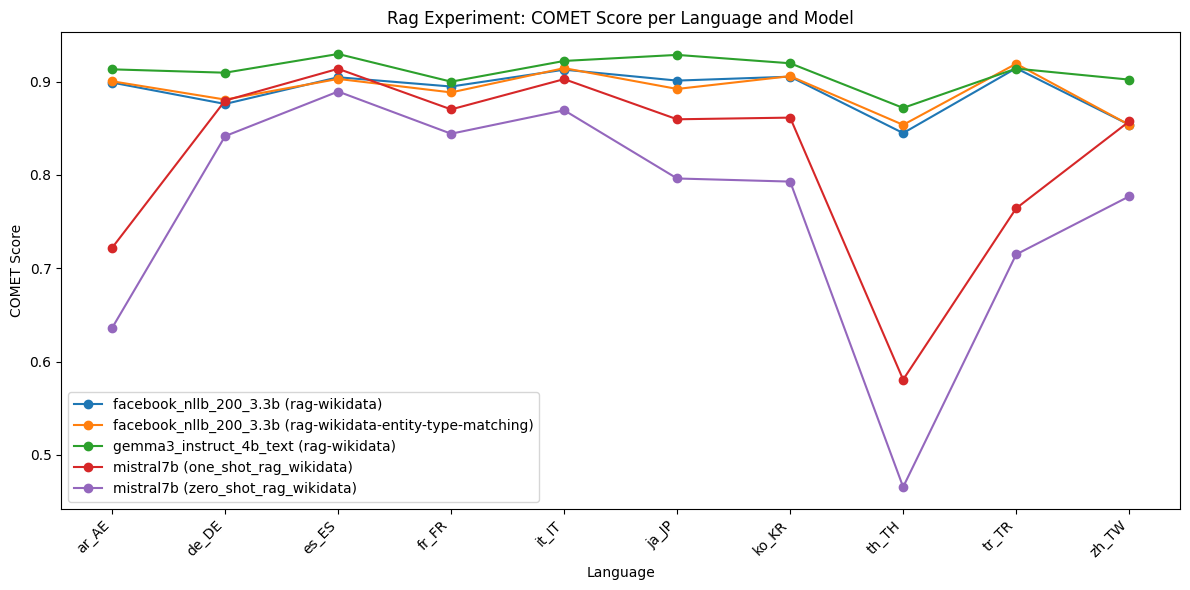


### Meta Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (rag-wikidata),56.371191,46.648427,55.615697,58.563536,61.095890,48.409405,47.248322,31.126761,50.546448,31.855956
1,facebook_nllb_200_3.3b (rag-wikidata-entity-ty...,56.094183,47.058824,53.179973,55.939227,59.726027,45.781466,52.885906,32.957746,52.732240,33.102493
2,gemma3_instruct_4b_text (rag-wikidata),69.667590,68.125855,72.665765,64.640884,74.794521,72.614108,67.248322,57.746479,60.792350,56.925208
3,mistral7b (one_shot_rag_wikidata),57.756233,58.823529,70.635995,53.176796,62.876712,53.250346,54.765101,44.366197,41.530055,49.584488
4,mistral7b (zero_shot_rag_wikidata),1.800554,21.887825,31.258457,26.381215,25.068493,3.181189,2.281879,0.281690,10.109290,4.016620


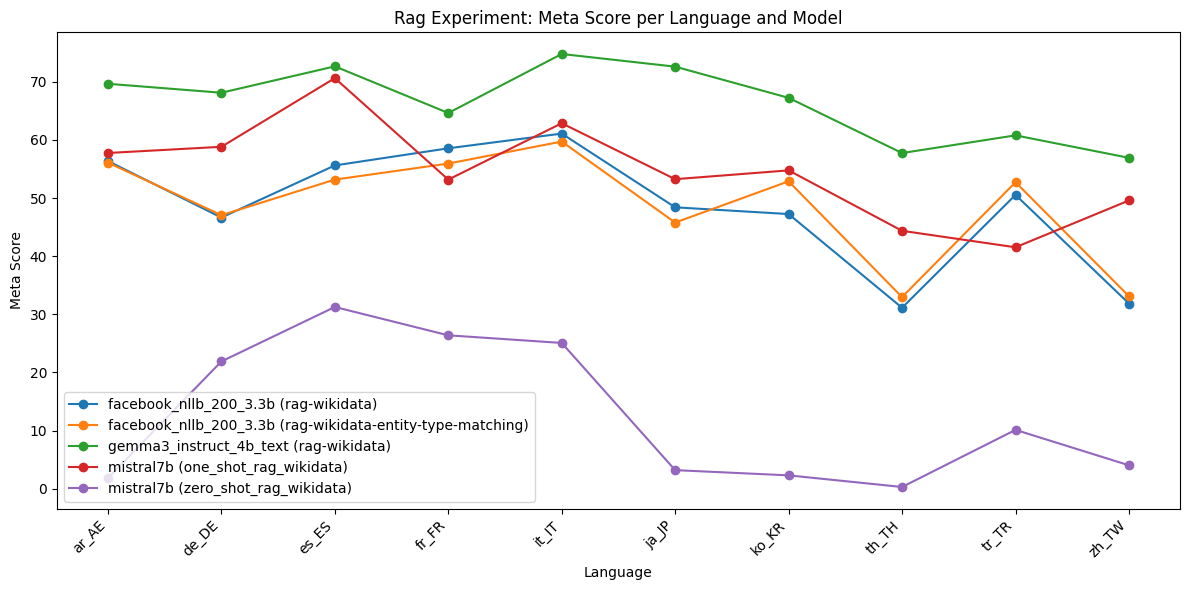


### Final Score (harmonic mean of COMET and META) Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (rag-wikidata),1.769955,1.719985,1.780599,1.762738,1.798918,1.769457,1.776777,1.645162,1.796439,1.663220
1,facebook_nllb_200_3.3b (rag-wikidata-entity-ty...,1.772485,1.729328,1.775830,1.749289,1.801507,1.750372,1.781395,1.664365,1.807034,1.664695
2,gemma3_instruct_4b_text (rag-wikidata),1.802910,1.795359,1.835977,1.775366,1.822070,1.834058,1.814737,1.717870,1.801070,1.776337
3,mistral7b (one_shot_rag_wikidata),1.426025,1.733629,1.804350,1.712604,1.779998,1.692108,1.696306,1.146089,1.500816,1.685619
4,mistral7b (zero_shot_rag_wikidata),0.939998,1.621023,1.729727,1.636106,1.680502,1.273685,1.176889,0.350972,1.335186,1.302176


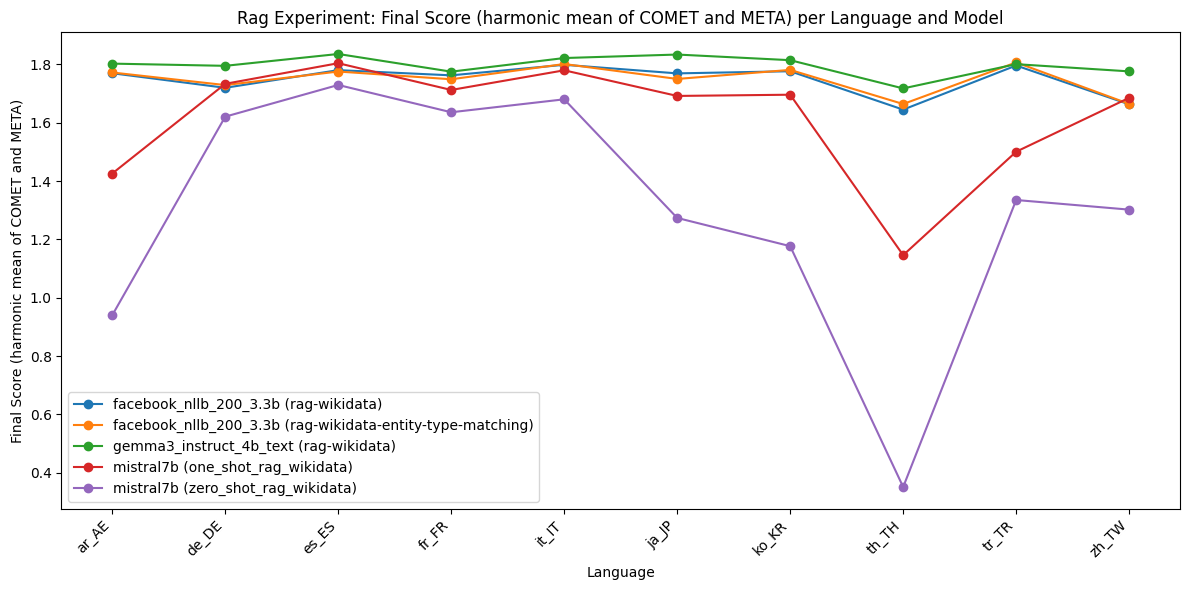


## Zeroshot Experiment

### Correct / Total Instances Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,Total Instances,722,731,739,724,730,723,745,710,732,722
1,facebook_nllb_200_3.3b (zero_shot),211,193,301,249,276,66,193,34,188,18
2,gemini-2.0-flash (zero-shot-1),277,327,391,348,356,NA,NA,NA,NA,NA
3,gemini-2.0-flash (zero-shot-2),281,307,396,321,358,NA,NA,NA,NA,NA
4,gemma3_instruct_4b_text (zero-shot),132,184,257,202,222,122,161,30,130,95
5,gpt-4o (zero-shot-1),269,274,372,302,352,318,364,98,280,266
6,gpt-4o (zero-shot-2),200,276,359,283,339,321,324,91,273,258
7,llama3.1_8b (zero_shot),79,170,246,209,221,84,85,23,94,81
8,llama3.1_8b (zero_shot_longer_prompt),74,166,243,187,215,66,52,24,106,67
9,mistral7b (zero_shot),14,159,239,196,188,15,24,4,77,26


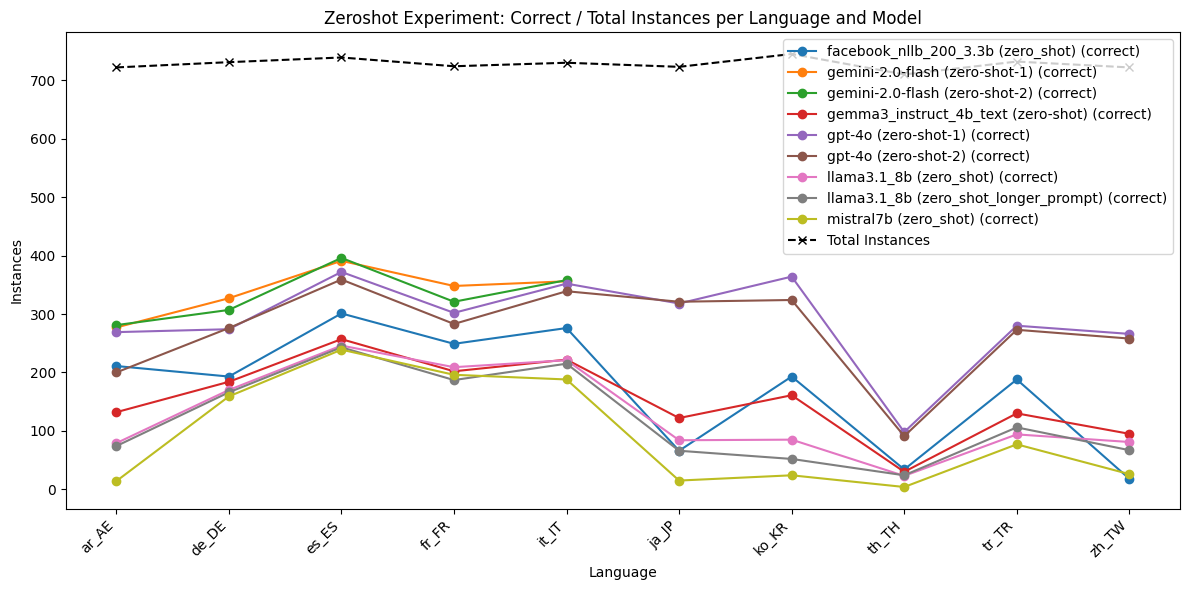


### COMET Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (zero_shot),0.894012,0.887837,0.914690,0.886039,0.901158,0.877546,0.909104,0.796988,0.908409,0.842765
1,gemini-2.0-flash (zero-shot-1),0.907877,0.904798,0.924312,0.905125,0.912862,NA,NA,NA,NA,NA
2,gemini-2.0-flash (zero-shot-2),0.895801,0.902184,0.923279,0.881997,0.915130,NA,NA,NA,NA,NA
3,gemma3_instruct_4b_text (zero-shot),0.870702,0.871655,0.911657,0.875383,0.889993,0.890555,0.897712,0.807715,0.888256,0.880877
4,gpt-4o (zero-shot-1),0.908606,0.897374,0.922383,0.900818,0.914007,0.936411,0.934396,0.829915,0.926527,0.922842
5,gpt-4o (zero-shot-2),0.885450,0.897071,0.920620,0.896157,0.910552,0.932317,0.92771,0.818079,0.925739,0.921094
6,llama3.1_8b (zero_shot),0.814061,0.857946,0.901855,0.860470,0.879568,0.851725,0.844446,0.721428,0.842651,0.824786
7,llama3.1_8b (zero_shot_longer_prompt),0.732168,0.794364,0.884256,0.821433,0.847478,0.766446,0.786775,0.708514,0.805609,0.760198
8,mistral7b (zero_shot),0.629800,0.845888,0.888324,0.845279,0.869485,0.788799,0.790001,0.470967,0.724187,0.766358


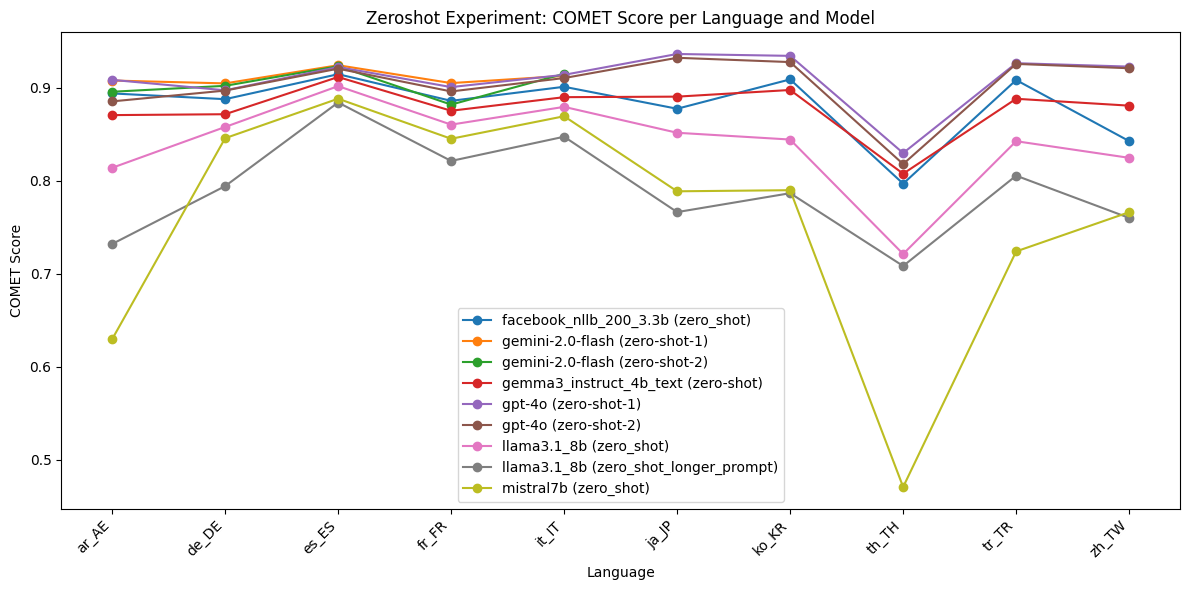


### Meta Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (zero_shot),29.224377,26.402189,40.730717,34.392265,37.808219,9.128631,25.90604,4.788732,25.68306,2.493075
1,gemini-2.0-flash (zero-shot-1),38.365651,44.733242,52.909337,48.066298,48.767123,NA,NA,NA,NA,NA
2,gemini-2.0-flash (zero-shot-2),38.919668,41.997264,53.585927,44.337017,49.041096,NA,NA,NA,NA,NA
3,gemma3_instruct_4b_text (zero-shot),18.282548,25.170999,34.776725,27.900552,30.410959,16.874136,21.610738,4.225352,17.759563,13.157895
4,gpt-4o (zero-shot-1),37.257618,37.482900,50.338295,41.712707,48.219178,43.983402,48.85906,13.802817,38.251366,36.842105
5,gpt-4o (zero-shot-2),27.700831,37.756498,48.579161,39.088398,46.438356,44.39834,43.489933,12.816901,37.295082,35.734072
6,llama3.1_8b (zero_shot),10.941828,23.255814,33.288227,28.867403,30.273973,11.618257,11.409396,3.239437,12.84153,11.218837
7,llama3.1_8b (zero_shot_longer_prompt),10.249307,22.708618,32.882273,25.828729,29.452055,9.128631,6.979866,3.380282,14.480874,9.279778
8,mistral7b (zero_shot),1.939058,21.751026,32.341001,27.071823,25.753425,2.074689,3.221477,0.56338,10.519126,3.601108


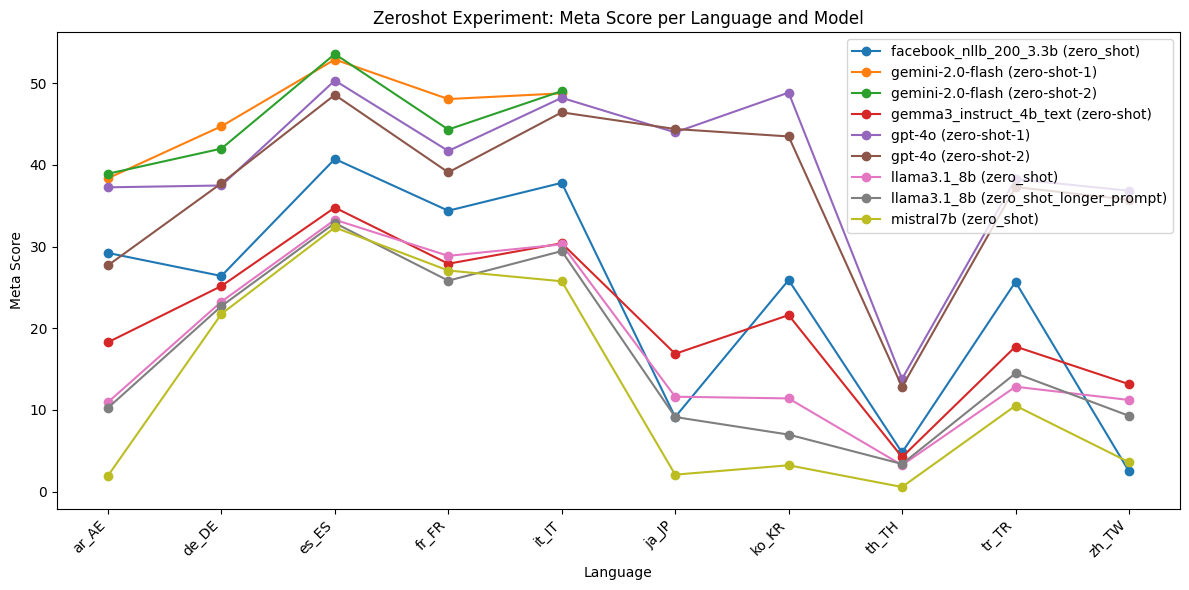


### Final Score (harmonic mean of COMET and META) Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,facebook_nllb_200_3.3b (zero_shot),1.734949,1.717905,1.789201,1.727571,1.760357,1.60117,1.756566,1.366542,1.754752,1.259698
1,gemini-2.0-flash (zero-shot-1),1.773780,1.773719,1.816884,1.776792,1.792177,NA,NA,NA,NA,NA
2,gemini-2.0-flash (zero-shot-2),1.751294,1.766421,1.815281,1.729587,1.796732,NA,NA,NA,NA,NA
3,gemma3_instruct_4b_text (zero-shot),1.662241,1.684962,1.776737,1.697507,1.729375,1.691822,1.723816,1.356183,1.691891,1.651211
4,gpt-4o (zero-shot-1),1.773950,1.752784,1.811571,1.763552,1.794008,1.833781,1.833723,1.565691,1.80923,1.800583
5,gpt-4o (zero-shot-2),1.716047,1.752504,1.806996,1.752143,1.786082,1.826284,1.816668,1.537991,1.806634,1.795895
6,llama3.1_8b (zero_shot),1.515378,1.654842,1.756131,1.671127,1.709471,1.587101,1.572505,1.180055,1.581523,1.536603
7,llama3.1_8b (zero_shot_longer_prompt),1.366705,1.535031,1.722199,1.592229,1.647548,1.414159,1.414146,1.171483,1.526305,1.405275
8,mistral7b (zero_shot),0.950788,1.628446,1.729152,1.639372,1.682177,1.14302,1.268843,0.513045,1.355083,1.26377


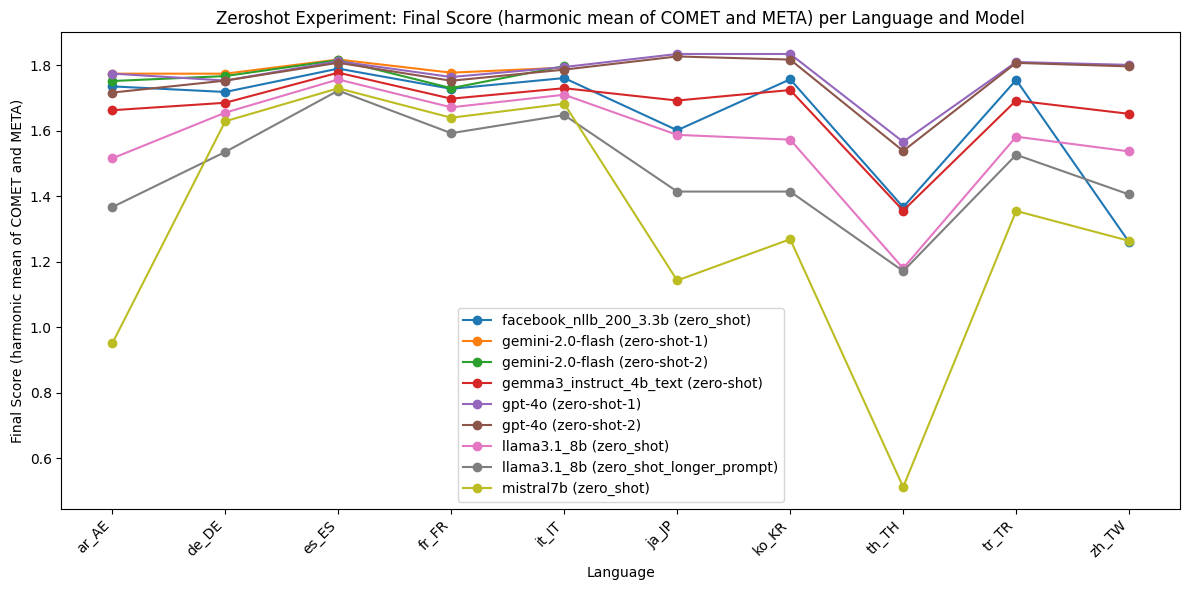


## Fewshot Experiment

### Correct / Total Instances Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,Total Instances,722,731,739,724,730,723,745,710,732,722
1,gemini-2.0-flash (few-shot),289,338,393,316,359,NA,NA,NA,NA,NA
2,gpt-4o (few-shot),291,307,407,300,364,0,0,0,0,0
3,llama3.1_8b (few(3)_shot),70,163,247,195,227,94,68,18,117,85
4,llama3.1_8b (few(3)_shot_longer_prompt),2,149,249,170,212,45,32,17,101,76
5,llama3.1_8b (one_shot_longer_prompt),74,132,234,178,182,30,35,15,105,75
6,mistral7b (one_shot),14,149,242,201,189,28,25,5,74,25


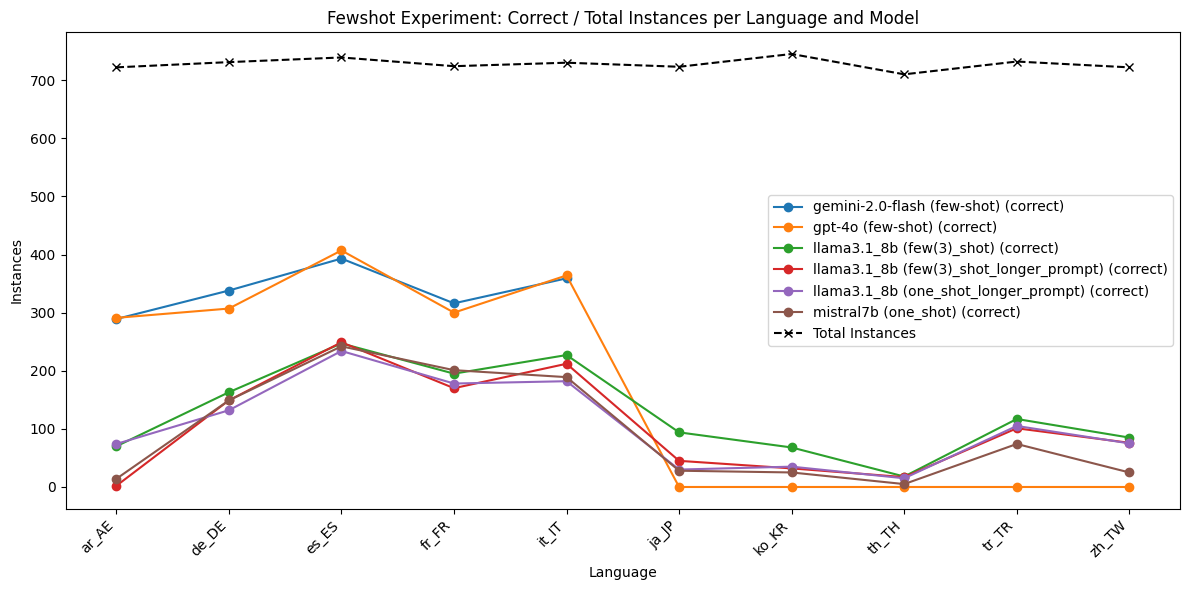


### COMET Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (few-shot),0.904642,0.901906,0.923532,0.899110,0.916286,NA,NA,NA,NA,NA
1,gpt-4o (few-shot),0.909567,0.898799,0.926188,0.899244,0.914019,0.320419,0.318831,0.306257,0.330402,0.324356
2,llama3.1_8b (few(3)_shot),0.758065,0.817910,0.893370,0.813730,0.837820,0.793364,0.789159,0.667263,0.813619,0.803496
3,llama3.1_8b (few(3)_shot_longer_prompt),0.775002,0.782419,0.899149,0.791490,0.811485,0.724958,0.652297,0.675251,0.812732,0.74775
4,llama3.1_8b (one_shot_longer_prompt),0.778907,0.792391,0.892918,0.764773,0.780366,0.701464,0.647615,0.662619,0.784995,0.772904
5,mistral7b (one_shot),0.631659,0.845818,0.888070,0.850543,0.871557,0.807261,0.797496,0.488756,0.730897,0.779732


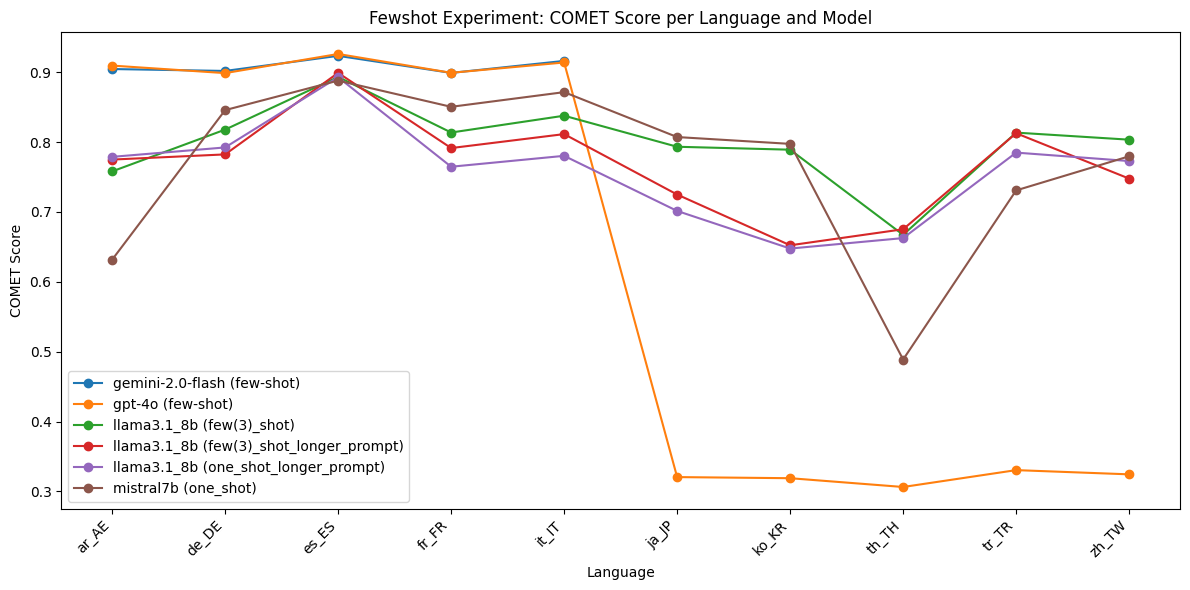


### Meta Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (few-shot),40.027701,46.238030,53.179973,43.646409,49.178082,NA,NA,NA,NA,NA
1,gpt-4o (few-shot),40.304709,41.997264,55.074425,41.436464,49.863014,0.0,0.0,0.0,0.0,0.0
2,llama3.1_8b (few(3)_shot),9.695291,22.298222,33.423545,26.933702,31.095890,13.001383,9.127517,2.535211,15.983607,11.772853
3,llama3.1_8b (few(3)_shot_longer_prompt),0.277008,20.383037,33.694181,23.480663,29.041096,6.224066,4.295302,2.394366,13.797814,10.526316
4,llama3.1_8b (one_shot_longer_prompt),10.249307,18.057456,31.664411,24.585635,24.931507,4.149378,4.697987,2.112676,14.344262,10.387812
5,mistral7b (one_shot),1.939058,20.383037,32.746955,27.762431,25.890411,3.872752,3.355705,0.704225,10.10929,3.462604


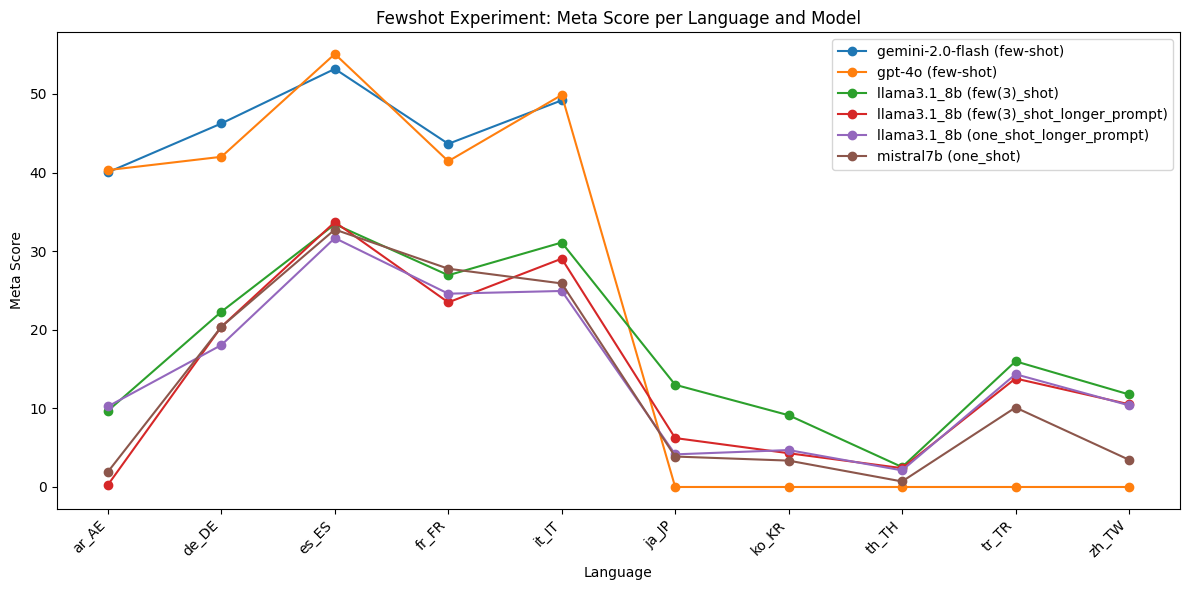


### Final Score (harmonic mean of COMET and META) Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (few-shot),1.769297,1.769300,1.815535,1.761925,1.799052,NA,NA,NA,NA,NA
1,gpt-4o (few-shot),1.778987,1.759932,1.821741,1.760286,1.795133,0.0,0.0,0.0,0.0,0.0
2,llama3.1_8b (few(3)_shot),1.406182,1.577941,1.740225,1.579732,1.631677,1.495471,1.452717,1.056466,1.548417,1.504323
3,llama3.1_8b (few(3)_shot_longer_prompt),0.408137,1.506990,1.751557,1.531361,1.578853,1.298654,1.132594,1.053421,1.535046,1.396311
4,llama3.1_8b (one_shot_longer_prompt),1.447787,1.518163,1.736858,1.483402,1.513363,1.200056,1.138314,1.008829,1.488529,1.438758
5,mistral7b (one_shot),0.952904,1.624237,1.729245,1.650520,1.686347,1.336031,1.288723,0.577032,1.363233,1.272837


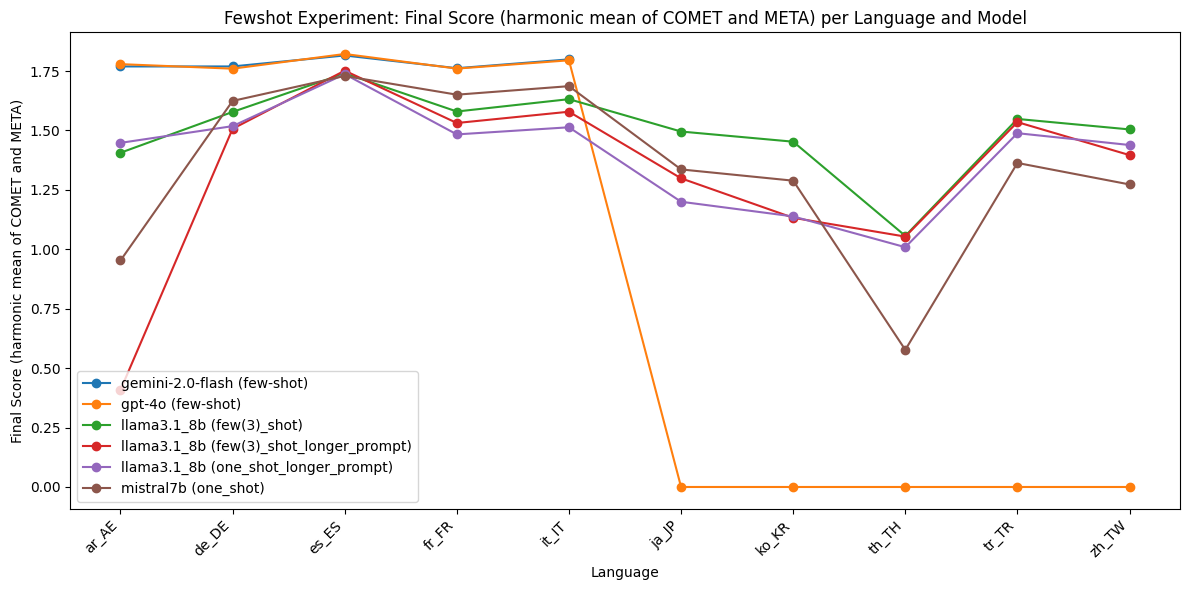


## Cot Experiment

### Correct / Total Instances Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,Total Instances,722,731,739,724,730,723,745,710,732,722
1,gemini-2.0-flash (cot),265,309,382,326,307,NA,NA,NA,NA,NA
2,gpt-4o (cot),228,294,393,305,347,312,355,104,270,280


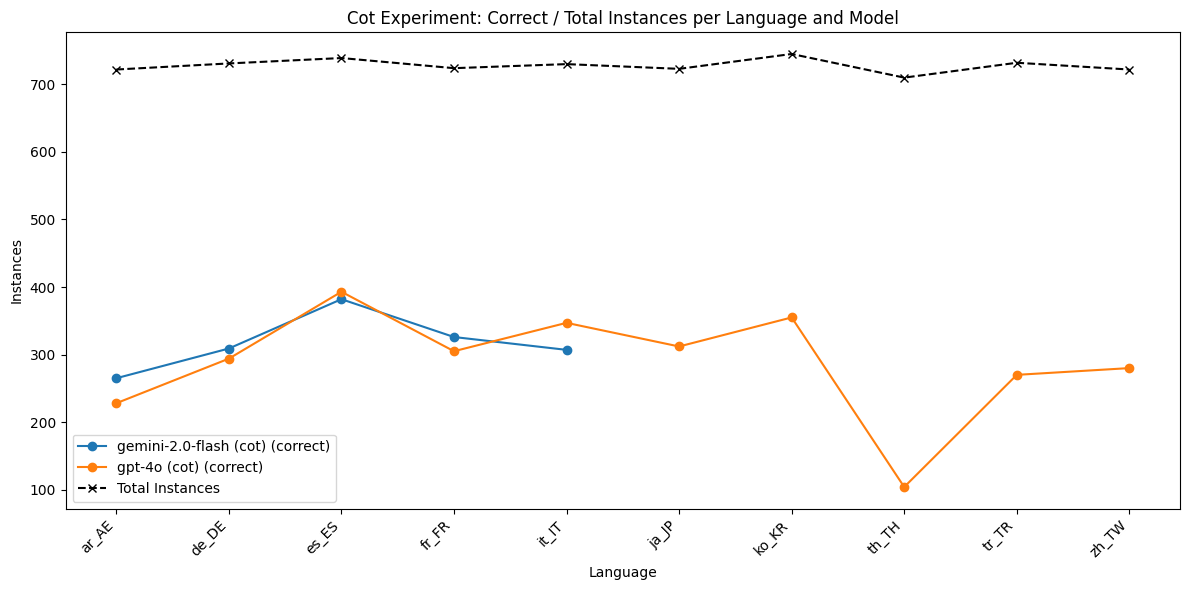


### COMET Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (cot),0.898485,0.900797,0.922098,0.900923,0.910102,NA,NA,NA,NA,NA
1,gpt-4o (cot),0.891195,0.898929,0.922957,0.898582,0.911873,0.933051,0.934914,0.833996,0.922442,0.925292


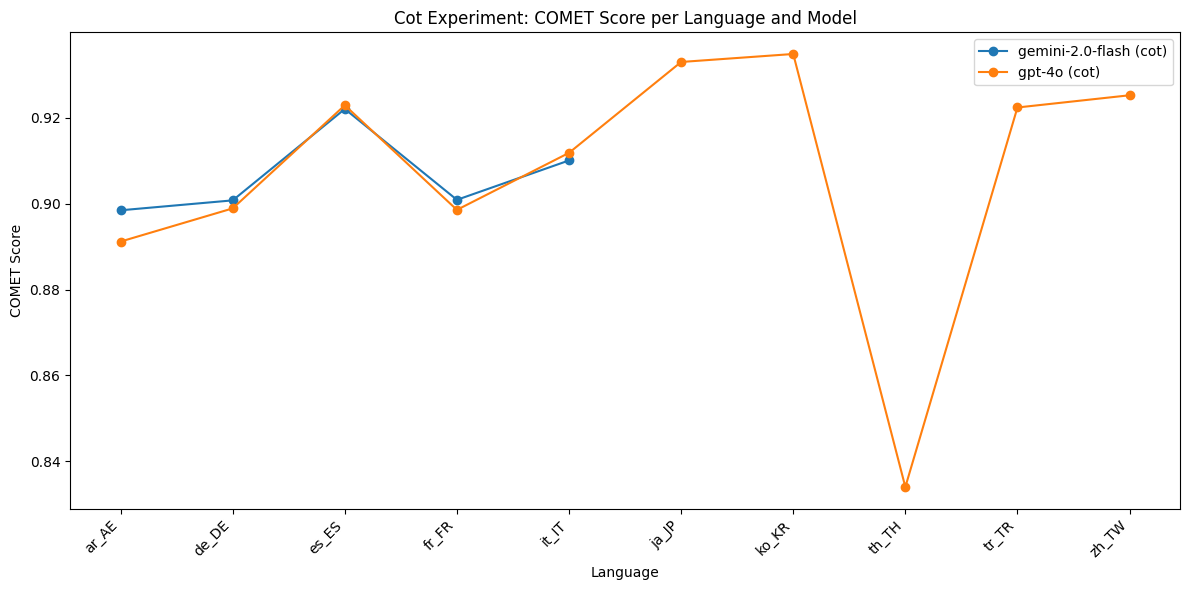


### Meta Score Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (cot),36.703601,42.270862,51.691475,45.027624,42.054795,NA,NA,NA,NA,NA
1,gpt-4o (cot),31.578947,40.218878,53.179973,42.127072,47.534247,43.153527,47.651007,14.647887,36.885246,38.781163


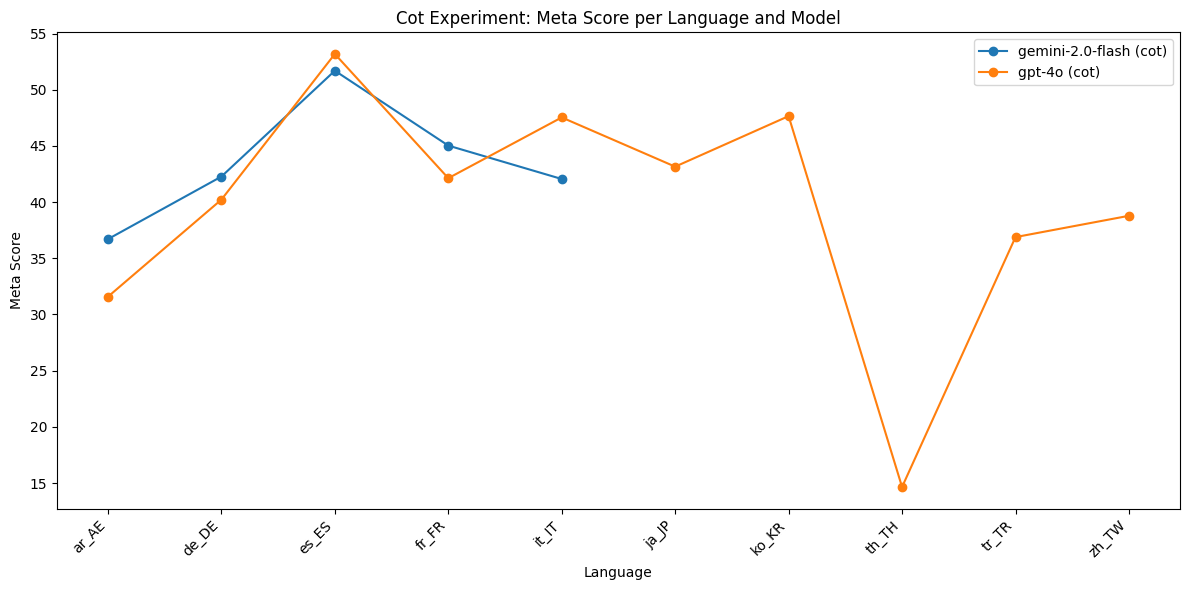


### Final Score (harmonic mean of COMET and META) Table


,Model,ar_AE,de_DE,es_ES,fr_FR,it_IT,ja_JP,ko_KR,th_TH,tr_TR,zh_TW
0,gemini-2.0-flash (cot),1.754031,1.764004,1.811874,1.766501,1.781647,NA,NA,NA,NA,NA
1,gpt-4o (cot),1.733469,1.758553,1.814425,1.759631,1.789419,1.826608,1.833847,1.578139,1.799872,1.807458


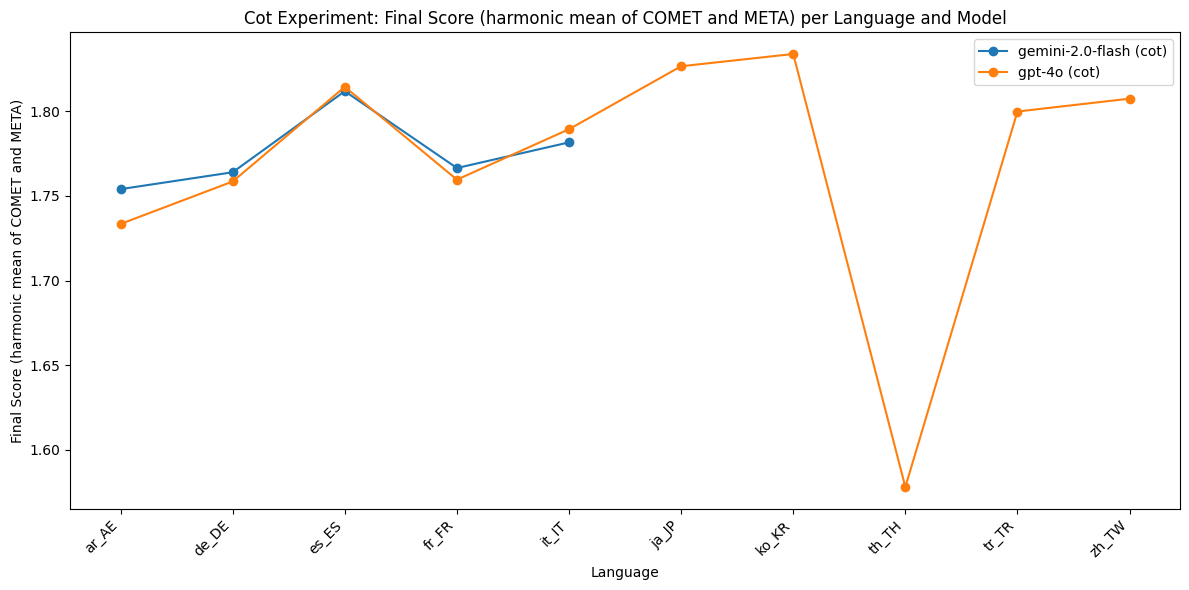

In [3]:
# For each experiment type, create a merged table and line graph for correct/total instances, and separate for other metrics
for exp_group in results:
    display_name = exp_group.capitalize()
    print(f"\n## {display_name} Experiment")
    exp_data = results[exp_group]
    # Collect all (model, experiment) pairs
    all_langs = set()
    all_model_exp = []
    for model in exp_data:
        for exp_name in exp_data[model]:
            all_model_exp.append((model, exp_name))
            all_langs.update(exp_data[model][exp_name].keys())
    all_langs = sorted(list(all_langs))
    all_model_exp = sorted(all_model_exp)
    # --- Merged Table for Correct/Total Instances ---
    total_instances_row = {"Model": "Total Instances"}
    for lang in all_langs:
        for model, exp_name in all_model_exp:
            val = exp_data[model][exp_name].get(lang, {}).get("total_instances", None)
            if val is not None:
                total_instances_row[lang] = val
                break
        else:
            total_instances_row[lang] = "NA"
    # Build correct instances rows
    correct_rows = []
    for model, exp_name in all_model_exp:
        row = {"Model": f"{model} ({exp_name})"}
        for lang in all_langs:
            val = exp_data[model][exp_name].get(lang, {}).get("correct_instances", None)
            row[lang] = val if val is not None else "NA"
        correct_rows.append(row)
    merged_df = pd.DataFrame([total_instances_row] + correct_rows)
    print(f"\n### Correct / Total Instances Table")
    display(merged_df)
    # Merged line graph: only plot values for languages where data is available for that (model, exp)
    plt.figure(figsize=(12, 6))
    for model, exp_name in all_model_exp:
        langs = []
        values = []
        for lang in all_langs:
            val = exp_data[model][exp_name].get(lang, {}).get("correct_instances", None)
            if val is not None:
                langs.append(lang)
                values.append(val)
        plt.plot(langs, values, marker='o', label=f"{model} ({exp_name}) (correct)")
    # Only plot total instances for languages where available
    langs_total = [lang for lang in all_langs if total_instances_row[lang] != "NA"]
    total_values = [total_instances_row[lang] for lang in langs_total]
    plt.plot(langs_total, total_values, linestyle='--', marker='x', color='black', label='Total Instances')
    chart_title = f"{display_name} Experiment: Correct / Total Instances per Language and Model"
    plt.title(chart_title)
    plt.ylabel("Instances")
    plt.xlabel("Language")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    # Save chart as PNG
    filename = chart_title.lower().replace(' ', '-').replace('/', '-').replace(':', '') + '.png'
    plt.savefig(os.path.join('images', filename), bbox_inches='tight')
    plt.show()
    # --- Other metrics as before, but with line+marker plots and NA for missing ---
    metric_keys_labels = [
        ("comet_score", "COMET Score"),
        ("meta_score", "Meta Score"),
        ("final_score", "Final Score (harmonic mean of COMET and META)")
    ]
    # Compute Final Score for each (model, exp, lang)
    for model, exp_name in all_model_exp:
        for lang in all_langs:
            comet = exp_data[model][exp_name].get(lang, {}).get("comet_score", None)
            meta = exp_data[model][exp_name].get(lang, {}).get("meta_score", None)
            if comet is not None and meta is not None and comet != "NA" and meta != "NA":
                try:
                    comet_f = float(comet)
                    meta_f = float(meta)
                    if comet_f + meta_f != 0:
                        final_score = 2 * (comet_f * meta_f) / (comet_f + meta_f)
                    else:
                        final_score = "NA"
                except Exception:
                    final_score = "NA"
            else:
                final_score = "NA"
            exp_data[model][exp_name].setdefault(lang, {})["final_score"] = final_score
    for metric_key, metric_label in metric_keys_labels:
        table_rows = []
        for model, exp_name in all_model_exp:
            row = {"Model": f"{model} ({exp_name})"}
            for lang in all_langs:
                val = exp_data[model][exp_name].get(lang, {}).get(metric_key, None)
                row[lang] = val if val is not None else "NA"
            table_rows.append(row)
        metric_df = pd.DataFrame(table_rows)
        print(f"\n### {metric_label} Table")
        display(metric_df)
        plt.figure(figsize=(12, 6))
        for model, exp_name in all_model_exp:
            langs = []
            values = []
            for lang in all_langs:
                val = exp_data[model][exp_name].get(lang, {}).get(metric_key, None)
                if val is not None and val != "NA":
                    langs.append(lang)
                    values.append(float(val))
            plt.plot(langs, values, marker='o', label=f"{model} ({exp_name})")
        chart_title = f"{display_name} Experiment: {metric_label} per Language and Model"
        plt.title(chart_title)
        plt.ylabel(metric_label)
        plt.xlabel("Language")
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        # Save chart as PNG
        filename = chart_title.lower().replace(' ', '-').replace('/', '-').replace(':', '') + '.png'
        plt.savefig(os.path.join('images', filename), bbox_inches='tight')
        plt.show()